## Chapter 5. Resampling Methods

### 1. Resampling method
1. Cross - Validation
   1. Validation Set Approach
   2. LOOCV
   3. K - Fold CV
2. Broostrap


### 2. What are Resampling Methods?

* fiited model에소 추가적인 정보를 얻기 위해서 training set에서 **반복추출**하여 만든 sample로 다시 fitting하는 방법.
* model training gksmsepeh Data 부족 => test mse를 계산하기 위한 data set 따로 준비하기 힘듦
* use AIC, BIC...
* BUT! 우리가 진정 원하는 겂은 **test MSE**
* SO! **CV**를 통해 test MSE를 **추정** 하자!

### 3. Validation Set Approach
* raw data를 랜덤하게 train data set과 validation data set으로 나눈다.
* 이때 validation data set은 test data set과 비슷한 느낌이다.

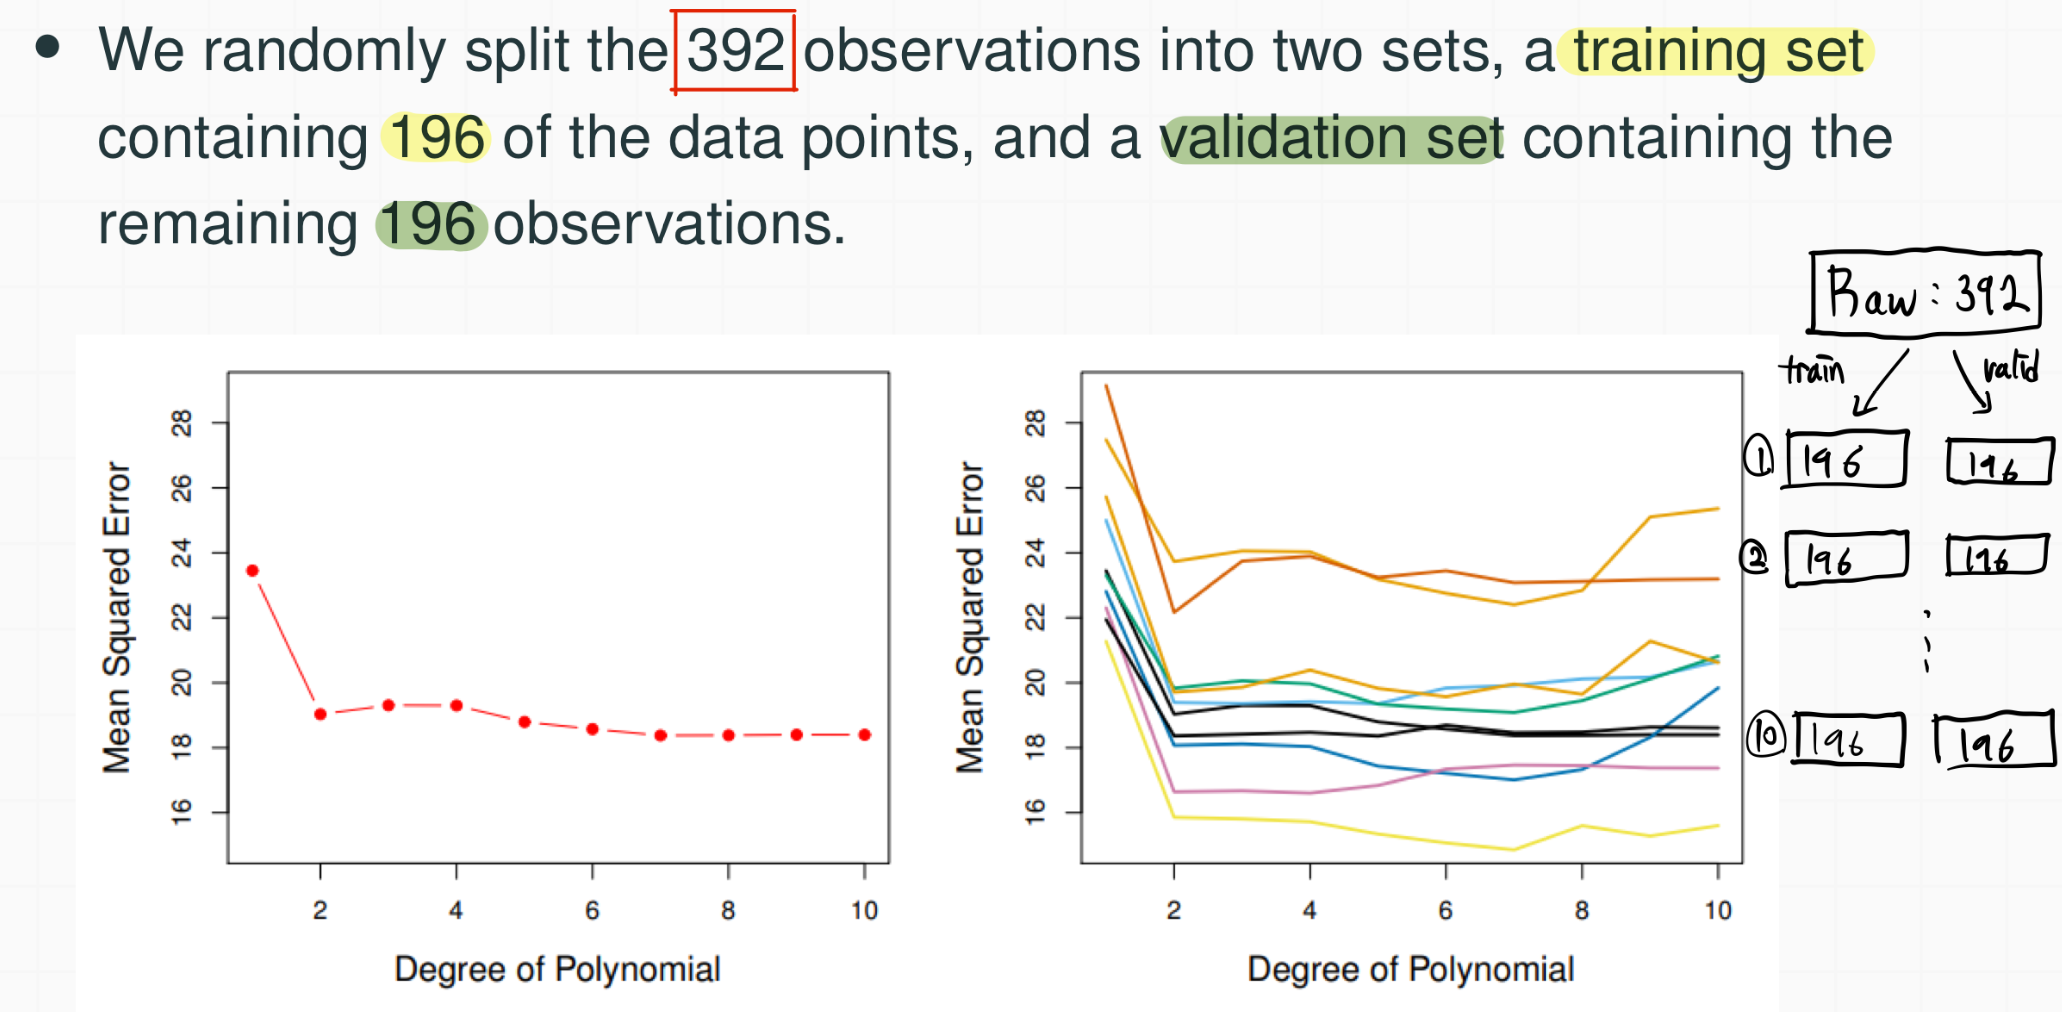

* Validation Set Approach에서 추정한 MSE은 위의 그래프와 같이 Variance가 매우 크다는 단점을 가지고 있다.
* WHY? 각 case마다 계산할때 쓰는 data set을 random하게 뽑으므로..
* SO! validation set error rate는 test error rate를 overestimate를 하는 경향이 크다.

### 4. LOOCV
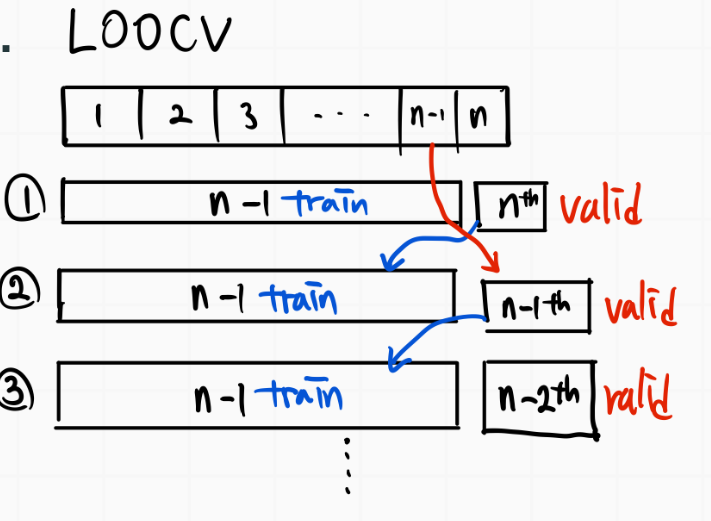

* LOOCV는 모든 경우를 고려하여 MSE을 구한다.
* 즉, data의 수가 n개 이면 총 n개의 MSE를 구하고 그 MSE의 mean을 최종 mse로 한다.
* 따라서 LOOCV는 bias가 매우 낮고 overestimate하는 경향이 매우 낮다.
* 하지만 data의 수 만큼 계산을 진행하므로 계산량이 매우 많은 단점을 가지고 있다.

### 5. K-fold CV
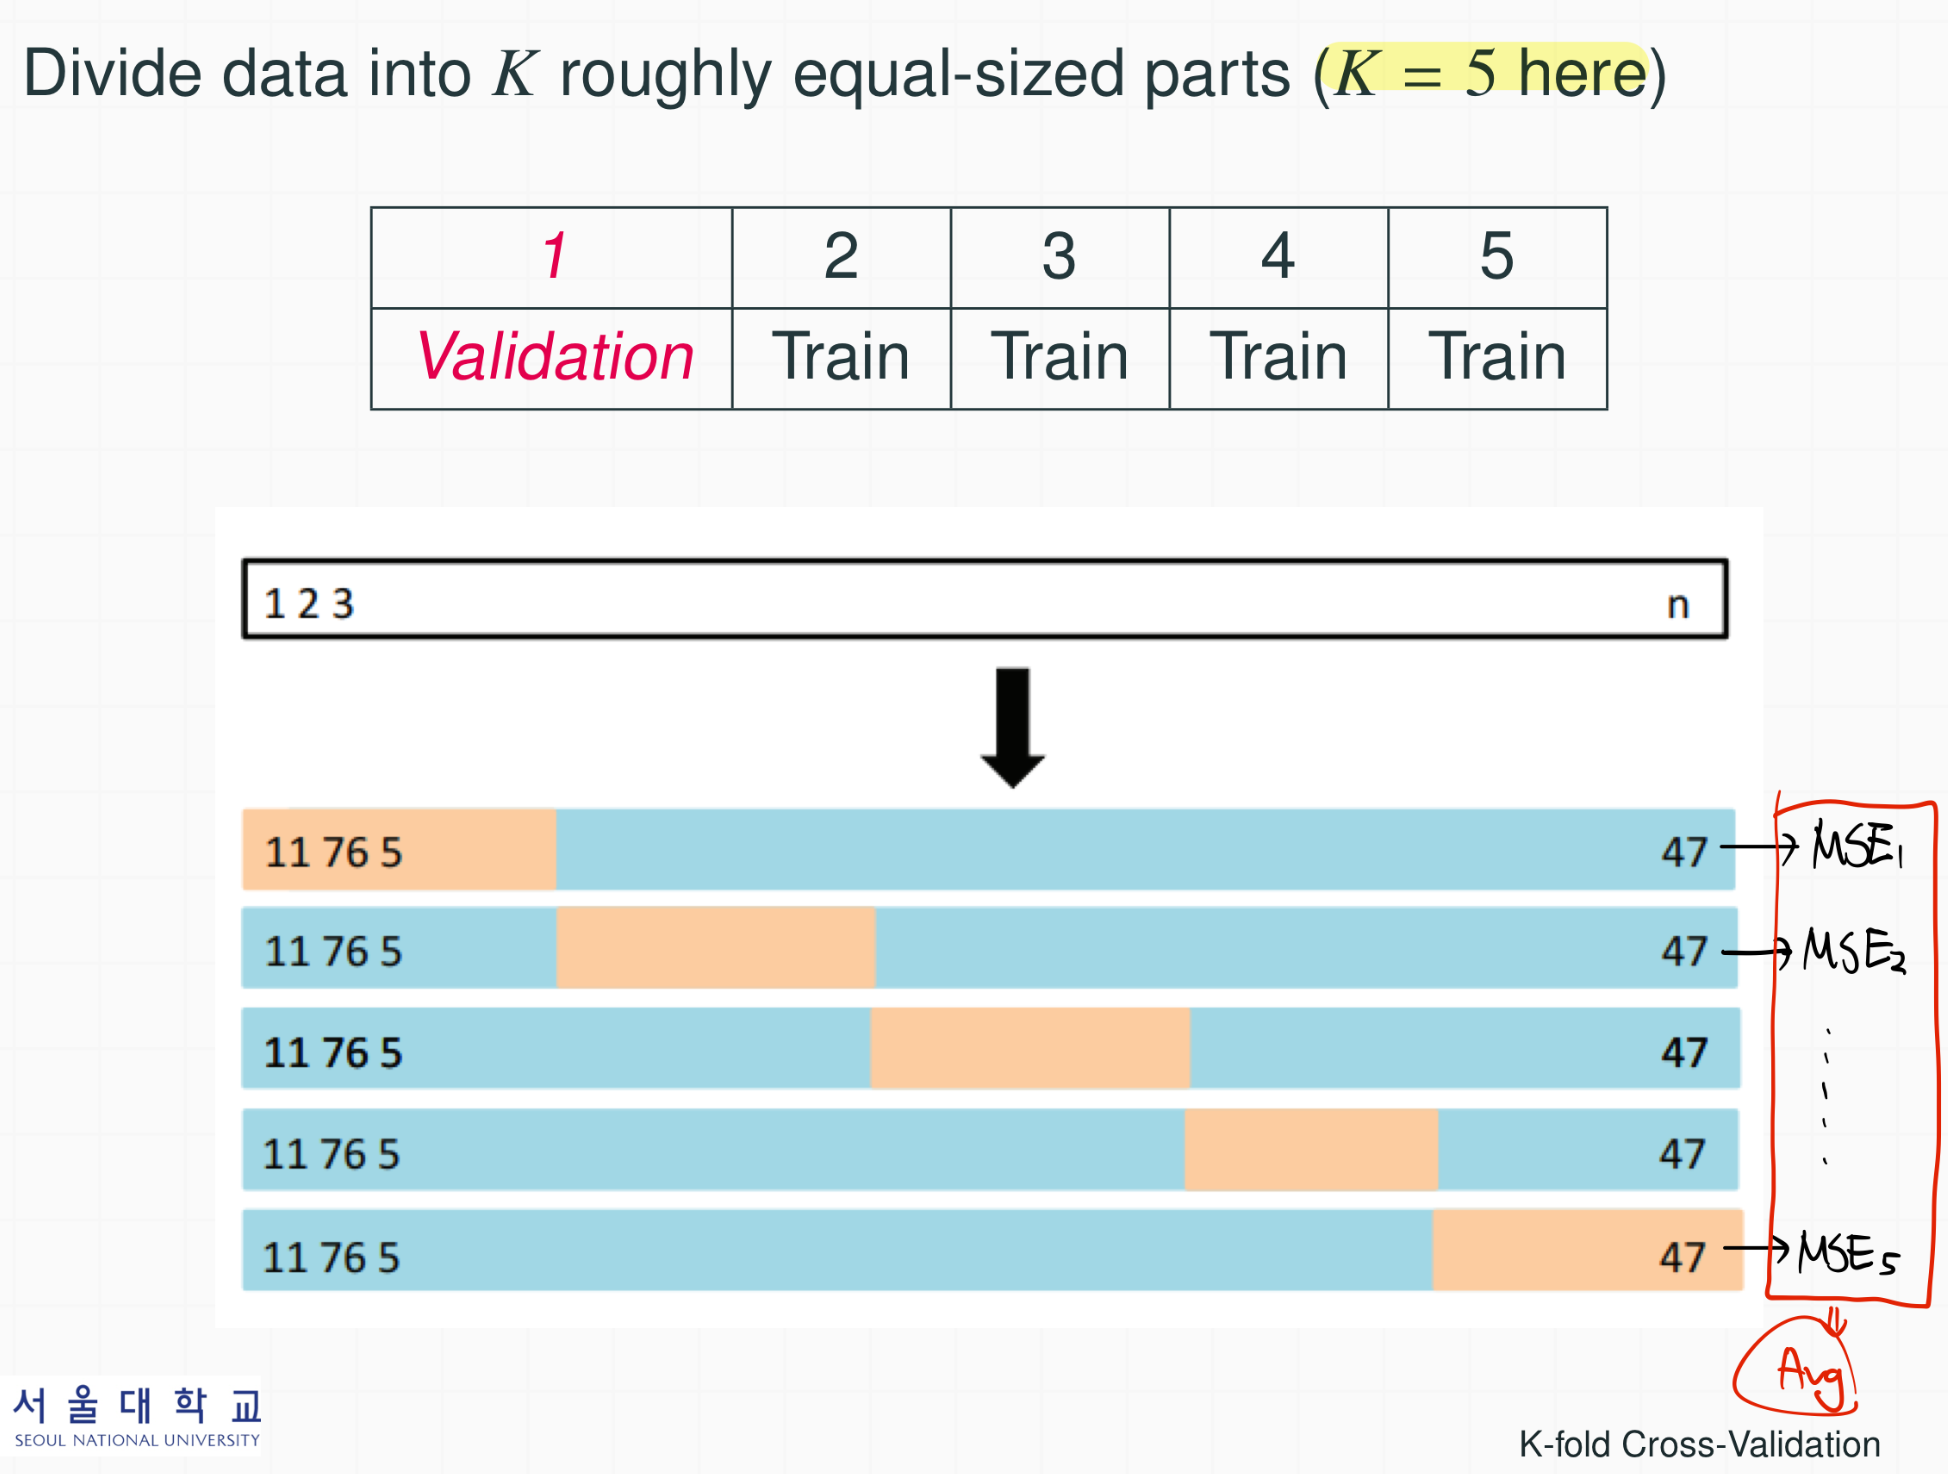

* k-fold CV는 LOOCV에서 **특정 묶음(#K)**를 설정하는 것이다.


### 6. K-fold CV vs LOOCV
1. K-fold가 당연히 LOOCV보다 계산적으로 유리하다.
2. 또한 LOOCV는 train data가 거의 비숫하다 -> 추정치가 매우 corr되어 있다 -> 따라서 추정치의 분산이 매우 크다는 단점을 가지고 있다.
> $$
\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y) + 2\text{Cov}(X, Y)
> $$


## 실습
* code from `파이썬 머신러닝 완벽 가이드`


#### 1 - 2. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기.

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 붓꽃 데이터 세트를 로딩
iris = load_iris()

# iris.data는 iris 데이터 세트에서 피처(feature, Predictor)만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris_label
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
# Validation Set Approach
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

# DecisionTreeClassifier 객체 생성
df_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
df_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = df_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


In [5]:
# Validation Set Approach를 여러번 진행
result = []
for i in range(1, 5):
    X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=i)
    df_clf = DecisionTreeClassifier(random_state=11)
    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    result.append(accuracy)
    print(f'{i}번째 진행 시 예측 정확도: {accuracy:.4f}')
# K-Fold CV


1번째 진행 시 예측 정확도: 0.9667
2번째 진행 시 예측 정확도: 0.9333
3번째 진행 시 예측 정확도: 1.0000
4번째 진행 시 예측 정확도: 0.9667


#### 1 - 04. Model Selection 모듈 소개

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier(random_state=156)
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 121)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [8]:
pred = dt_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9556


In [38]:
# LOOCV
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data  # feature
y = iris.target  # label

# 모델 생성
dt_clf_loocv = DecisionTreeClassifier()

# LOOCV 초기화
loo = LeaveOneOut()

# 예측값과 실제값 저장 리스트
pred_list = []
actual_list = []

# LOOCV 수행
for i, (train_index, test_index) in enumerate(loo.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # 모델 학습
    dt_clf_loocv.fit(X_train, y_train)
    
    # 예측
    pred = dt_clf_loocv.predict(X_test)
    
    # 예측값과 실제값 저장
    pred_list.append(pred[0])
    actual_list.append(y_test[0])
    
    if (i + 1) % 10 == 0:
        interim_accuracy = accuracy_score(actual_list, pred_list)
        print(f'{i+1}번째 진행 시 누적 정확도: {interim_accuracy:.4f}')


# 예측값과 실제값 비교
overall_accuracy = accuracy_score(actual_list, pred_list)
print('LOOCV 전체 정확도 : {0:.4f}'.format(overall_accuracy))

10번째 진행 시 누적 정확도: 1.0000
20번째 진행 시 누적 정확도: 1.0000
30번째 진행 시 누적 정확도: 1.0000
40번째 진행 시 누적 정확도: 1.0000
50번째 진행 시 누적 정확도: 1.0000
60번째 진행 시 누적 정확도: 1.0000
70번째 진행 시 누적 정확도: 1.0000
80번째 진행 시 누적 정확도: 0.9750
90번째 진행 시 누적 정확도: 0.9667
100번째 진행 시 누적 정확도: 0.9700
110번째 진행 시 누적 정확도: 0.9636
120번째 진행 시 누적 정확도: 0.9583
130번째 진행 시 누적 정확도: 0.9538
140번째 진행 시 누적 정확도: 0.9500
150번째 진행 시 누적 정확도: 0.9533
LOOCV 전체 정확도 : 0.9533


In [53]:
# K-Fold CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X = iris.data  # feature
y = iris.target  # label

kfold = KFold(n_splits=5)

cv_accuracy = []

n_iter = 0
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    cv_accuracy.append(accuracy)
    n_iter += 1
    print(f'{n_iter}번째 진행 시 예측 정확도: {accuracy:.4f}')


print(f'평균 정확도: {np.mean(cv_accuracy):.4f}')

1번째 진행 시 예측 정확도: 1.0000
2번째 진행 시 예측 정확도: 0.9667
3번째 진행 시 예측 정확도: 0.8333
4번째 진행 시 예측 정확도: 0.9333
5번째 진행 시 예측 정확도: 0.8000
평균 정확도: 0.9067


In [56]:
# cross_val_score
from sklearn.model_selection import cross_val_score

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X = iris.data  # feature
y = iris.target  # label

score = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')
print('개별 정확도: {0}'.format(score))
print('평균 정확도: {0:.4f}'.format(np.mean(score)))

개별 정확도: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
평균 정확도: 0.9533
